# Pymaceuticals Inc.
---

### Analysis

- With Campomulin for mouse # b128, the treatment seems to work well until somewhere between day 30 and 40. After this point, the treatment loses efficacy and the tumor begins to grow again. There may be a limited time period before the tumor cells adapt to the treatment. 

- There was a strong Pearson correlation coefficient of 0.84 for weight and tumor volume. This supports the idea that an increase in weight for the mice is correlated to the growth of the tumor size. 

- Capomulin and Ramicane had the most amount of mice participants and had the smallest final tumor volumes. It can be inferred that these two treatments are the best options for tumors in mice. 
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
len(data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_dataframe = pd.DataFrame({
    'Mean Tumor Volume' : mean
    , 'Median Tumor Volume' : median
    , 'Tumor Volume Variance' : variance
    , 'Tumor Volume Std. Dev.' : standard_dev
    , 'Tumor VOlume Std. Err.' : sem
})

summary_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor VOlume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary = data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
drug_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

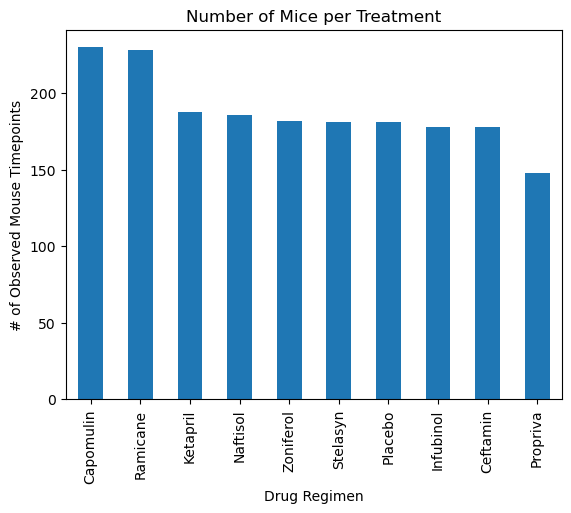

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = data_clean['Drug Regimen'].value_counts()
drug_count.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Mice per Treatment')

plt.show()

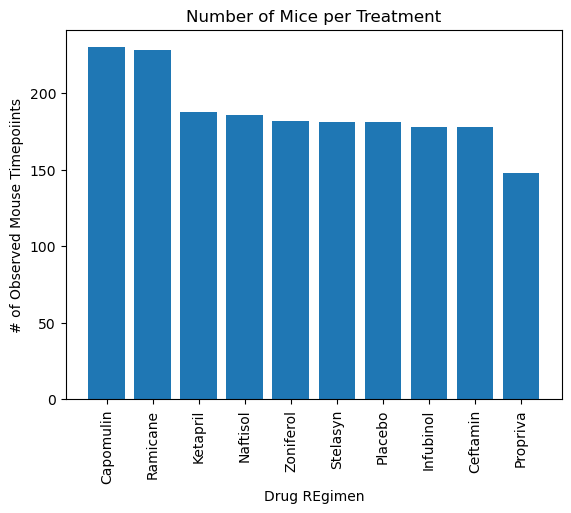

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = drug_count.index.values
y = drug_count.values

plt.bar(x, y)
plt.xlabel('Drug REgimen')
plt.ylabel('# of Observed Mouse Timepoiints')
plt.xticks(rotation=90)
plt.title('Number of Mice per Treatment')
plt.show()

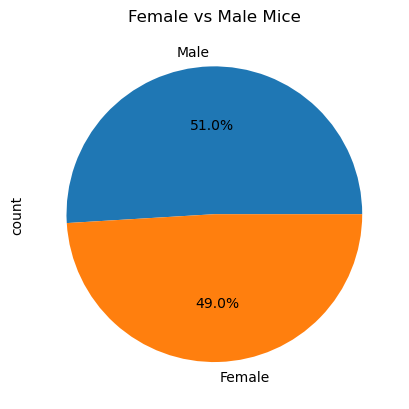

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = data_clean['Sex'].value_counts()
sex.plot.pie(autopct = '%1.1f%%')
plt.title('Female vs Male Mice')
plt.show()

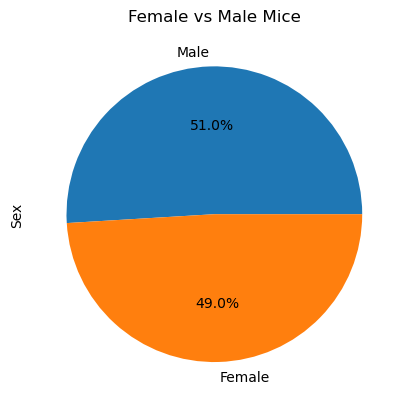

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex.values, labels=sex.index.values, autopct= '%1.1f%%')
plt.ylabel('Sex')
plt.title('Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = data_clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = greatest_timepoint.merge(data_clean, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Filter the treatment regimes
capomulin_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculate the final tumor volume
capomulin_sum = capomulin_tumor_vol.sum()
ramicane_sum = ramicane_tumor_vol.sum()
infubinol_sum = infubinol_tumor_vol.sum()
ceftamin_sum = ceftamin_tumor_vol.sum()

# Print the final tumor volume
print("The final tumor volume for Capomulim is", capomulin_sum)
print("The final tumor volume for Ramicane is", ramicane_sum)
print("The final tumor volume for Infubinol is", infubinol_sum)
print("The final tumor volume for Ceftamin is", ceftamin_sum)

The final tumor volume for Capomulim is 916.68919298
The final tumor volume for Ramicane is 904.78476071
The final tumor volume for Infubinol is 1454.45614463
The final tumor volume for Ceftamin is 1443.8494206300002


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen']==x, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartile = tumor_volumes.quantile([.25, .5, .75])
    lower_quartile = quartile[0.25]
    upper_quartile = quartile[0.75]
    interquartile = upper_quartile-lower_quartile
    lower_bound = lower_quartile - (1.5*interquartile)
    upper_bound = upper_quartile + (1.5*interquartile)
    outliers = tumor_volumes.loc[(tumor_volumes<lower_bound)|(tumor_volumes>upper_bound)]

    print(f"{x} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


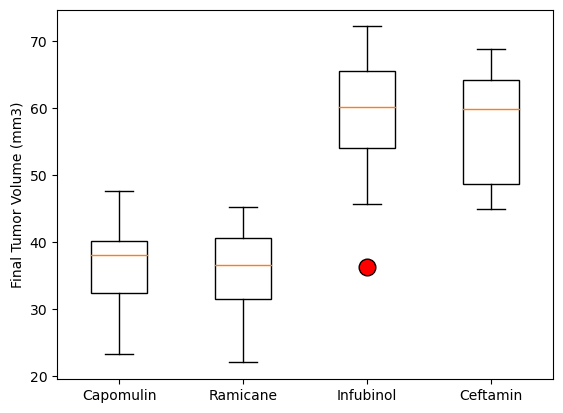

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, patch_artist=True, boxprops=dict(facecolor='white'), 
            capprops=dict(color='black'), whiskerprops=dict(color='black'), 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=12))

# Set the x-axis tick labels
plt.xticks(range(1, len(treatments) + 1), treatments)

# Set the y-axis label
plt.ylabel('Final Tumor Volume (mm3)')
# Show the plot
plt.show()

## Line and Scatter Plots

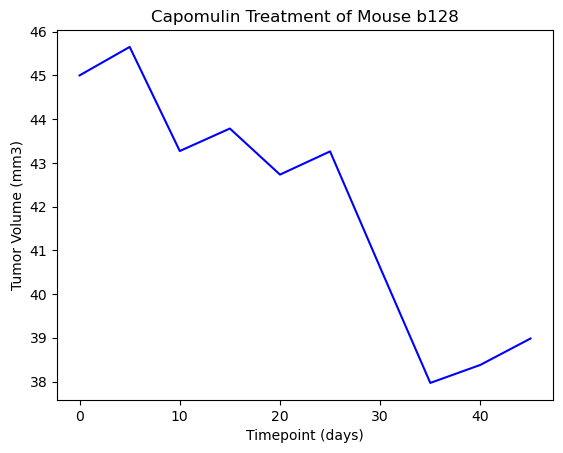

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = data_clean.loc[data_clean['Drug Regimen'] == 'Capomulin']

# Select a mouse ID
mouse_id = 'b128'

# Filter the DataFrame to include data for the selected mouse
selected_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(selected_mouse_df['Timepoint'], selected_mouse_df['Tumor Volume (mm3)'], color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Set the title
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')

# Show the plot
plt.show()

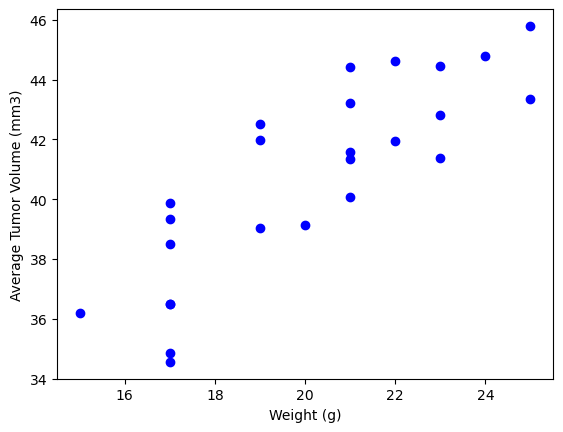

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the DataFrame by mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Plot 
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'],color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


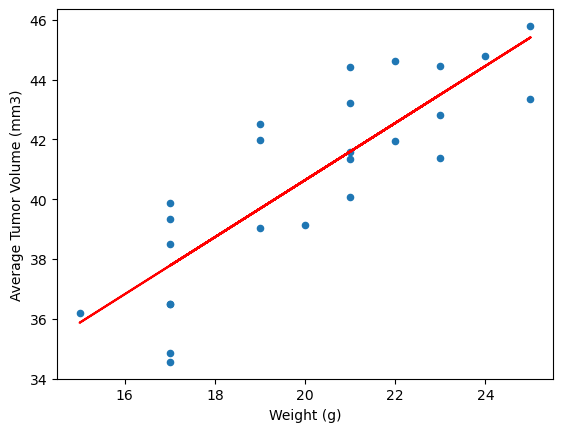

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = round(st.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])[0], 2)
print("The correlation between mouse weight and the average tumor volume is: {:.2f}".format(correlation))

# Get the linear regression
slope, intercept, rvalue, pvalue, _ = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
regression_line = slope * avg_tumor_volume['Weight (g)'] + intercept

# Plot
avg_tumor_volume.plot.scatter(x= 'Weight (g)', y= "Tumor Volume (mm3)")
plt.plot(avg_tumor_volume['Weight (g)'], regression_line, color= 'red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()